# EDA-TimeSeriesAnalysis-Scikit Lesson

## Correlation and Relationship Analysis

For this lesson, we will need the following packages; numpy, pandas, matplotlib, sklearn

Correlation and relationship analysis are important techniques in data science for understanding the association between variables. In this lesson, we will explore the concept of correlation, it's types, and how to analyze relationships between variables using Python. We will use practical examples to demonstrate these concepts.

Correlation measures the statistical relationship between two variables. It helps us understand how changes in one variable are associated with changes in another variable. Correlation does not imply causation, but it indicates the strength and direction of the relationship.

There are different correlation coefficients used to quantify the relationship between variables:

Pearson correlation coefficient (r): It measures the linear relationship between two continuous variables. The value of r ranges from -1 to +1. A positive value indicates a positive linear relationship, a negative value indicates a negative linear relationship, and a value close to zero indicates no linear relationship.

In [25]:
import numpy as np
import pandas as pd

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])

# Calculate Pearson correlation coefficient
correlation_matrix = np.corrcoef(x, y)

# since .corrcoef returns a matrix of the correlations
# for different combinations of variables, we choose the index
# [0, 1] to access the correlation for variable 1 (0th index) 
# and variable 2 (1st index)
pearson_coefficient = correlation_matrix[0, 1]

print("Pearson correlation coefficient:", correlation_matrix)

Pearson correlation coefficient: [[1. 1.]
 [1. 1.]]


<span style = "background-color: yellow">
TODO: Choose 2 numerical variables that you would like to analyze the relationship between. Using our pokemon example, a good choice could be HP and Attack. After choosing the variables, find the correlation coefficient for the 2 variables. Then, explain what your resulting coefficient means to your classmates.
</span>

We can also visualize our correlation by seeing the scatterplot of the variables plotted against one another.

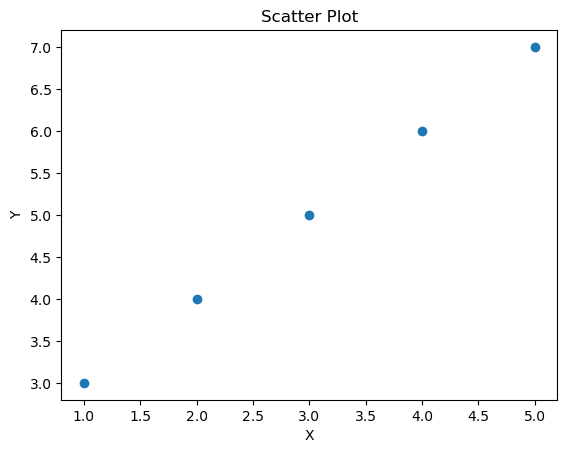

In [26]:
import matplotlib.pyplot as plt

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

When interpreting correlation coefficients, consider the following:

Positive Correlation: A positive correlation coefficient indicates that as one variable increases, the other variable tends to increase as well. The closer the value is to +1, the stronger the positive correlation.

Negative Correlation: A negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease. The closer the value is to -1, the stronger the negative correlation.

No Correlation: A correlation coefficient close to zero indicates no linear relationship between the variables. However, it's important to note that there could still be a non-linear relationship or a relationship that is not captured by the correlation coefficient.

Correlation analysis may be affected by missing values and outliers in the data. It's crucial to handle them appropriately:

Missing Values: Missing data can lead to biased correlation results. You can handle missing values by imputation techniques (e.g., mean, median, or regression imputation) or by removing observations with missing data, depending on the situation.

Outliers: Outliers can have a significant impact on correlation coefficients. Consider identifying and handling outliers before performing correlation analysis. Techniques like winsorization, trimming, or using robust correlation measures can help mitigate the influence of outliers.

# What is Machine Learning

For the next few lessons, we will be diving into machine-earning. Machine-learning is a branch of artificial intelligence (AI) that focuses on developing algorithms and models that enable computers to learn and make predictions or decisions without being explicitly programmed. In simple terms, machine-learning is about teaching computers how to learn from data and use that knowledge to perform tasks or make predictions.

The 3 fundamental steps of machine-Learning can be described as first getting your data, then creating a model and fitting it to the existing data, and lastly using the model to make predictions based off of how it is fitted.

# Intro to Scikit-learn

Scikit-learn, also known as sklearn, is a widely-used open-source machine-learning library for Python. It provides a range of efficient tools and algorithms for various machine-learning tasks, including classification, regression, clustering, dimensionality reduction, model selection, and preprocessing of data.

First, we need to load our data set. Sklearn does have its own pre-loaded datasets that we can access. Since all of our datasets come from a source outside sklearn, we access our dataset using pandas like we have done in the past. 

In [27]:
import pandas as pd

# Load a dataset from a CSV file using Pandas
data = pd.read_csv('students_performance.csv')
data.columns
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44
4,male,group C,some college,standard,none,76.0,78.0,75


Now before we do any actual Machine Learning, we need to prep our data. Machine Learning at heart is using Statistical methods to predict an outcome. We cannot predict anything if our variables are all categorical. Alot of your data sets use Categorical Variables (an example in our `students_performance.csv` dataset would be the gender column having a string stating whether someone is female or male) for various columns. One way we can convert these into Quantitative Variables is by using the OneHotEncoder class inside of sklearn. It looks for all the unique values in a column and converts them into respective values. Using our student's example, it may convert male to 0 and female to 1. 

Here's how you would use it:

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder and fit_transform the data
encoder = OneHotEncoder()

# store our new data in a variable
quantitative_data = encoder.fit_transform(data[['gender']])

# Print the transformed data as an array
print(quantitative_data.toarray())

# Print the encoded feature names
print(encoder.get_feature_names())

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

<span style = "background-color: yellow">
TODO: Now that we know how to transform Categorical Variables into Quantitative Variables, think about a column you may want to predict and what column or columns you may want to use as your features. Then, if those selected feature columns are not already quantitative variables, convert them.
</span>

Now we can split our data into features and the column we are trying to predict. X would be our column(s) that we use as features and would be the column we want to predict.

In [29]:
import pandas as pd

# Load a dataset from a CSV file using Pandas
data = pd.read_csv('students_performance.csv')

X = data.iloc[:, :-1].values  # Features
# [:, :-1] specifies that we want to select all rows (:) and all columns except the last one (:-1).

y = data.iloc[:, -1].values  # Target variable
# [:, -1] specifies that we want to select all rows (:) and only the last column (-1).

# if we want specific columns, we could replace the -1 with a different index or with brackets around the column names

# .values converts the selected data into a NumPy array.


For today, we will be learning about the K-Nearest Neighbors Classifier. The K-Nearest Neighbors (KNN) classifier is a simple and intuitive algorithm for classification tasks. It works based on the idea that similar data points tend to belong to the same class.Imagine you have a dataset with labeled examples of different objects, such as fruits, where each object has certain features like color, shape, and size. The KNN classifier aims to classify new, unlabeled objects based on their similarity to the labeled objects.

If we were to look at this from a graphical perspective using our students example, imagine we have a scatterplot with our level of education(X) plotted against math score(y). We have a point with a level of eduction of 'bachelors' that we want to predict the math score of. The KNN Classifier would choose k-points that are closest to this point on the scatterplot and take the average math score of these points to estimate the predicted point's math score.

How KNN Works:

- Step 1: Select a value for k, which represents the number of nearest neighbors to consider.
- Step 2: Given a new, unlabeled object, find the k nearest neighbors to that object in the feature space.
- Step 3: Determine the majority class among the k neighbors.
- Step 4: Assign the majority class as the predicted class for the new object.

Now that we know how KNN works, we have to split our dataset into training and testing data. Think of training data as the material used to teach a model. It consists of examples or observations with known input values and corresponding output labels or target values. The training data is used to build or train the model. The model learns patterns, relationships, and rules from the training data, enabling it to make predictions or decisions. Testing data is used to assess how well the trained model generalizes to unseen or new data. It serves as a benchmark to evaluate the model's performance and measure it's ability to make accurate predictions on data it hasn't encountered during training.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# here we are splitting our data into training and testing datasets
# the test_size parameter allows us to change what percent of our data we want to designate for testing

In [31]:
# Create an instance of the KNeighborsClassifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'female'

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<span style = "background-color: yellow">
TODO: Using the knowledge we have about KNN, create a model to predict the values of your column of choice. 
</span>

# Time Series Analysis

For this section we will need the following packages; pandas, matplotlib, numpy, statsmodels, sklearn, 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Section 1

### Time Series Analysis Basics and loading data

Time series analysis is a sequence of evenly spaced out observations recorded at a specific time interval. 

Time series analysis involves multiple steps...
- 1) Data Collection
- 2) Data Preprocessing
- 3) Visualization
- 4) Stationarity Assessment
- 5) Model Selection
- 6) Parameter Estimation
- 7) Model Fitting and Diagnostic Checking
- 8) Forecasting

Different sources will have slightly different wording and may merge a few steps together but the essence of TSA(Time-Series analysis) is to achieve an effective model capable of forecasting, pattern recognition, anomaly detection, etc... It's usage could be applied to a wide variety of different positions and fields, basically anywhere that data is collected over time can be a use-case for TSA.

In [ ]:
df_stocks = pd.read_csv('sp500_index.csv')

## Section 2

### Data Preprocessing

Data preprocessing is to clean the data by handling missing values, outliers, and inconsistencies. This step may also involve transforming the data if necessary, such as taking logarithms or differencing to stabilize the variance. Since time-series data is evenly spaced out filling in these NA values is incredibly important.

In [ ]:
import numpy as np

# Handle missing values by filling with the mean
data_filled = df_stocks.fillna(df_stocks['S&P500'].mean())

# Log transformation to stabilize variance
data_log = np.log(df_stocks['S&P500'])

## Section 3

### Visualization of the data

Plot the time series data to observe it's overall pattern and identify any apparent trends, seasonality, or other patterns. Visualization can provide insights into the underlying behavior of the data.

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.plot(df_stocks['S&P500'])
plt.title('S&P 500 over time')
plt.xlabel('Time(days)')
plt.ylabel('Value(points)')
plt.show()

## Section 4

### Stationarity Assessment

Check if the time series data is stationary, meaning it has a constant mean and variance over time. Stationarity is an important assumption for many time series models. If the data is not stationary, it may require transformation or differencing to achieve stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
result = adfuller(df_stocks['S&P500'])

# Check p-value for stationarity
p_value = result[1]
if p_value < 0.05:
    print('Time series is stationary')
else:
    print('Time series is non-stationary')

Since the data is non-stationary, we must find a method to stabilize the variance and the mean over time.

Method 1: Log Transformation
If the data exhibits exponential growth or has a varying variance, applying a logarithmic transformation can help stabilize the variance and make it exhibit higher stationarity.

In [ ]:
# Differencing to achieve stationarity
stationary_data = df_stocks['S&P500'].diff().dropna()

In [ ]:
result = adfuller(stationary_data)

# Check p-value for stationarity
p_value = result[1]
if p_value < 0.05:
    print('Time series is stationary')
else:
    print('Time series is non-stationary')

Since the data has stationarity we can move on to the next step which would be selecting a model to best represent our data.

## Section 5

### Model Selection

Select an appropriate time series model based on the characteristics of the data. Common models include autoregressive integrated moving average (ARIMA), exponential smoothing methods, and state space models. The choice of model depends on the presence of trends, seasonality, and other specific characteristics observed in the data.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(stationary_data, order=(1, 1, 1))
model_fit = model.fit(method_kwargs={'optimizer_kwargs': {'disp': 0}})

## Section 6

### Parameter Estimation

Estimate the parameters of the chosen model using various estimation techniques, such as maximum likelihood estimation (MLE) or least squares.

In [ ]:
# Estimate parameters using maximum likelihood estimation
model_fit = model.fit(method_kwargs={'optimizer_kwargs': {'disp': 0}})

## Section 7

### Model Fitting and Diagnostic Checking

Fit the model to the data and evaluate its performance. This step involves checking the residuals for patterns or systematic deviations from randomness. Diagnostic tests help ensure that the model assumptions are met and the model adequately captures the data patterns.

In [ ]:
# Plot residuals
residuals = model_fit.resid
plt.plot(stationary_data)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Perform Ljung-Box test for residual randomness
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calculate Ljung-Box test statistics and p-values
lb_value, p_value = acorr_ljungbox(residuals)

# Check p-value for residual randomness
if all(p > 0.05 for p in p_value):
    print('Residuals are random')
else:
    print('Residuals have patterns')

## Section 8

### Forecasting

Use the fitted model to make predictions about future values of the time series. Forecasting can provide valuable insights for decision-making and planning.

In [ ]:
# Make predictions for future values
forecast = model_fit.forecast(steps=10)

# Print forecasted values
print(forecast)